Outcome Visualization

In [1]:
suf = "1204_201132"
img_title = "HAM10000"
n_classes = 7

In [2]:
import numpy as np
import os
data_root = "C:/Users/20878/221Project/HAM10K/tmp/HAM10000"
# Load the .npy file
dict_batch = np.load(os.path.join(data_root, suf, "HAM10000_dict_batch_1204_201132.npy"), allow_pickle=True).reshape(1)[0]
dict_imgSize = np.load(os.path.join(data_root, suf, "HAM10000_dict_imgSize_1204_201132.npy"), allow_pickle=True).reshape(1)[0]

train_loss_list = np.load(os.path.join(data_root, suf, "HAM10000_train_loss_1204_201132.npy")) 
train_acc_list = np.load(os.path.join(data_root, suf, "HAM10000_train_acc_1204_201132.npy"))
test_loss_list = np.load(os.path.join(data_root, suf, "HAM10000_test_loss_1204_201132.npy"))
test_acc_list = np.load(os.path.join(data_root, suf, "HAM10000_test_acc_1204_201132.npy"))
test_auc_list = np.load(os.path.join(data_root, suf, "HAM10000_test_auc_1204_201132.npy"))
val_loss_list = np.load(os.path.join(data_root, suf, "HAM10000_val_loss_1204_201132.npy"))
val_acc_list = np.load(os.path.join(data_root, suf, "HAM10000_val_acc_1204_201132.npy"))
                

In [3]:
import seaborn as sns

from utils import ImageShow,draw_size_acc,one_hot
from utils import confusion_matrix,metrics_scores,pff

In [4]:
show = ImageShow(train_loss_list = train_loss_list,
                 train_acc_list = train_acc_list,
                test_loss_list = test_loss_list,
                test_acc_list = test_acc_list,
                test_auc_list = test_auc_list,
                val_loss_list = val_loss_list,
                val_acc_list = val_acc_list,
                )

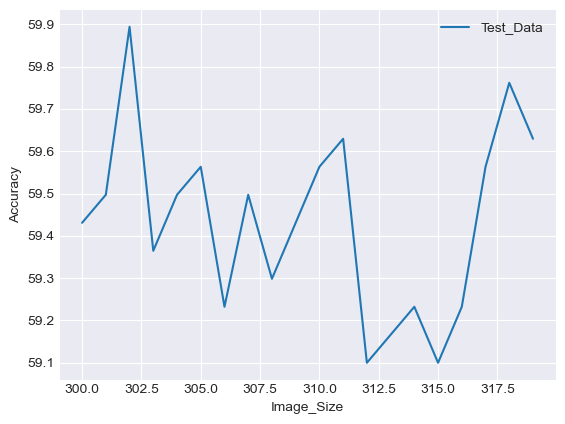

In [5]:
draw_size_acc(dict_imgSize,custom_path='./tmp',img_title=img_title,suf=suf)

In [6]:
import torch
test_evl_result = torch.load(os.path.join(data_root, suf, "best_test_evl_result.pth"))
val_evl_result = torch.load(os.path.join(data_root, suf, "best_val_evl_result.pth")) 
cla_dict = {0: 'akiec', 1: 'bcc', 2: 'bkl', 3: 'df', 4: 'mel', 5: 'nv', 6: 'vasc'}
metrics_scores(test_evl_result,n_classes,cla_dict)

+--------+-----------+--------+-------+----------+
|  Type  | Precision | Recall |   F1  | Accuracy |
+--------+-----------+--------+-------+----------+
| akiec  |   0.1765  |  0.07  |  0.1  |          |
|  bcc   |   0.3803  |  0.29  | 0.329 |          |
|  bkl   |   0.3061  | 0.069  | 0.113 |          |
|   df   |   0.0952  | 0.091  | 0.093 |          |
|  mel   |   0.2895  | 0.064  | 0.105 |          |
|   nv   |   0.6776  | 0.914  | 0.778 |          |
|  vasc  |   0.2174  | 0.429  | 0.288 |          |
| Total: |           |        |       |  0.5989  |
+--------+-----------+--------+-------+----------+


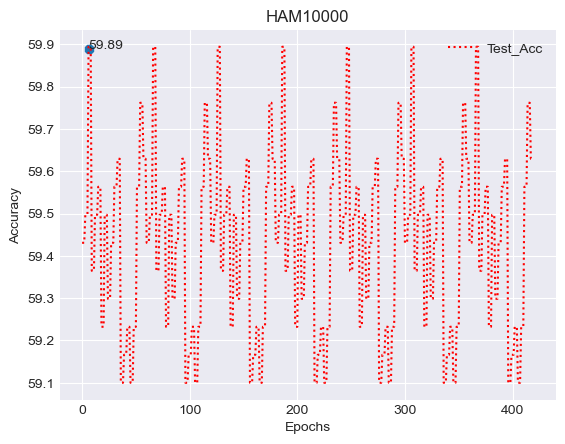

In [7]:
show.test(write=True,custom_path='./tmp',img_title=img_title,suf=suf)

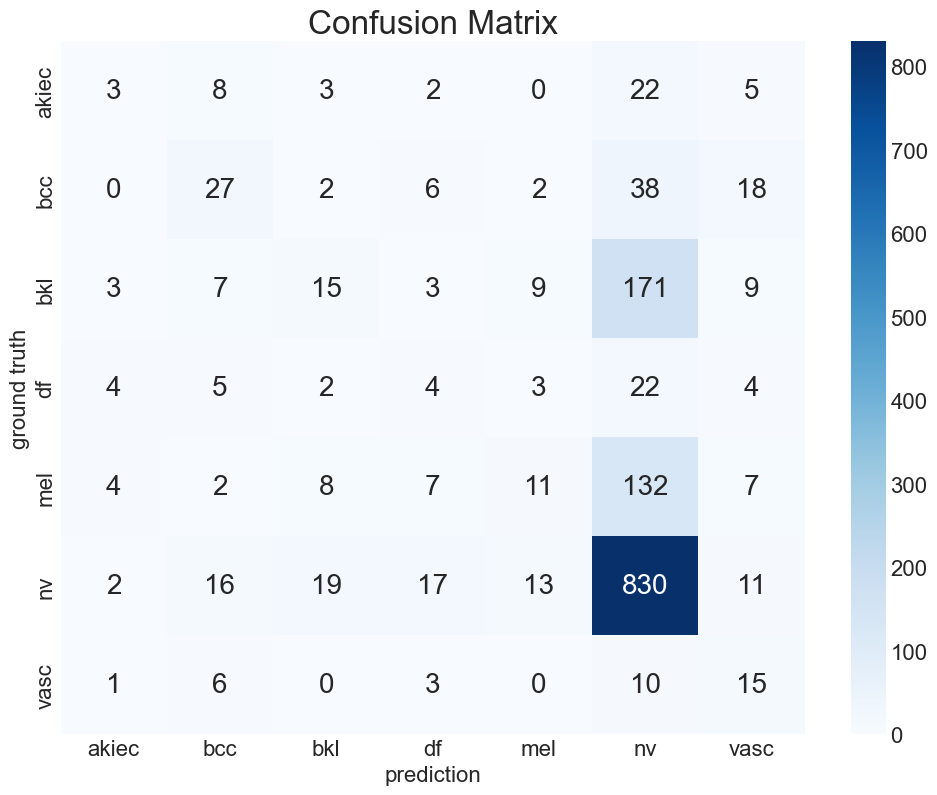

In [8]:
confusion_matrix(test_evl_result,n_classes,cla_dict,kn="test",img_title=img_title,suf=suf)

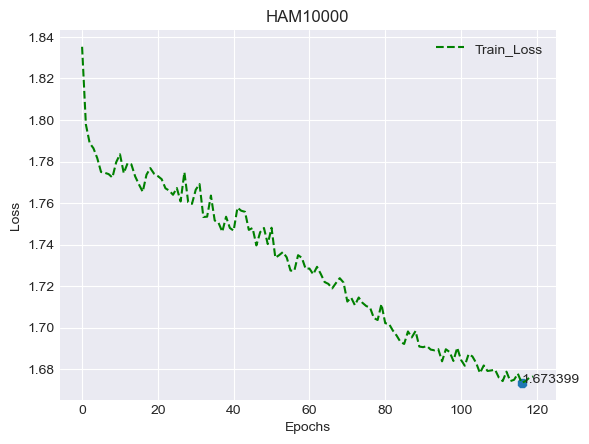

In [9]:
show.train(write=True,custom_path='./tmp',img_title=img_title,suf=suf)

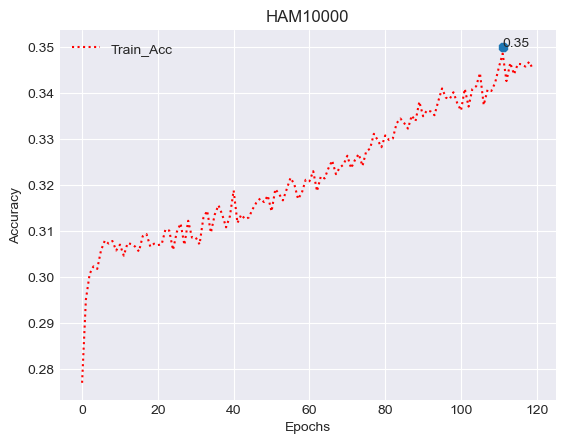

In [10]:
show.train(opt='Acc',write=True,custom_path='./tmp',img_title=img_title,suf=suf)

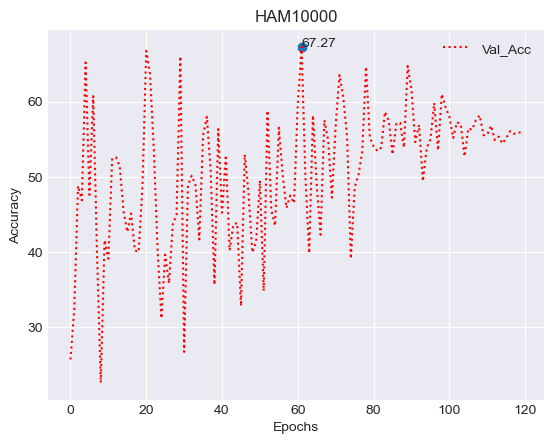

In [11]:
show.val(write=True,custom_path='./tmp',img_title=img_title,suf=suf)

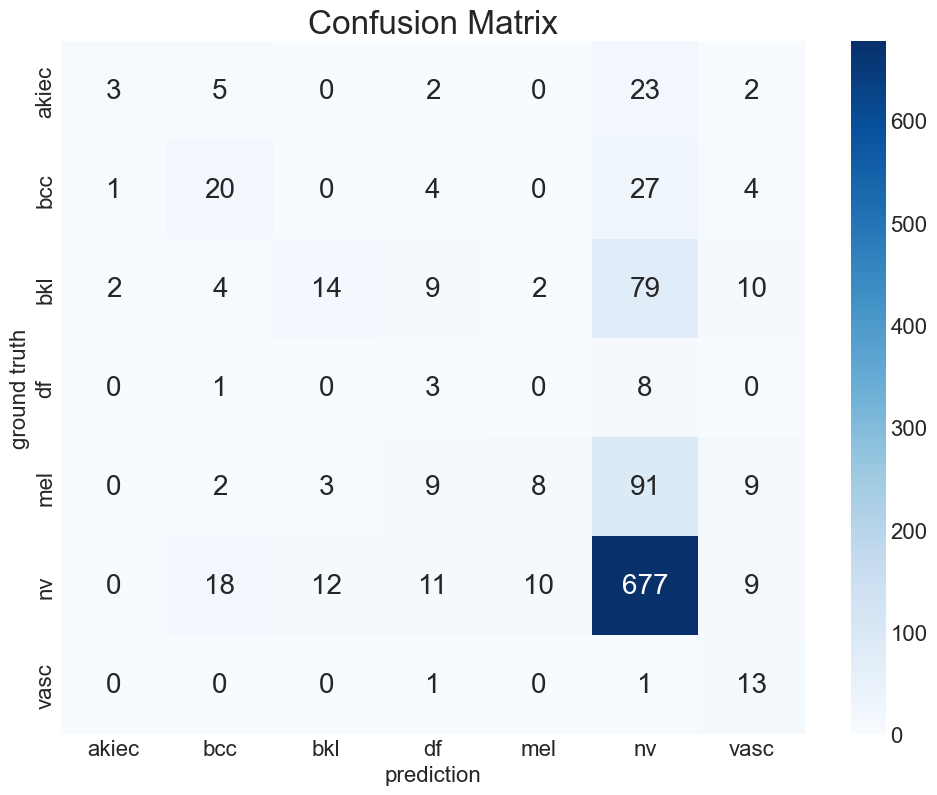

In [12]:
confusion_matrix(val_evl_result,n_classes,cla_dict,kn="val",img_title=img_title,suf=suf)